In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization
from tensorflow.keras.models import Model

In [2]:
def load_images(path):
    filenames = os.listdir(path)
    images = []
    for filename in tqdm(filenames):
        image = cv2.imread(path+'/'+filename)
        image = cv2.resize(image, (20,20))
        images.append(image)
    
    return np.asarray(images)

In [3]:
background_images = load_images('../input/road-occupancy-prediction/background_images_small_selected')
foreground_images = load_images('../input/road-occupancy-prediction/foreground_images_small_selected')

100%|██████████| 254/254 [00:01<00:00, 131.40it/s]


In [4]:
def show_images(image_array, starting_index=0):
    fig, axes = plt.subplots(ncols=7, nrows=2, figsize=(16, 4))
    index = starting_index
    for i in range(2):
        for j in range(7):
            axes[i,j].imshow(image_array[index])
            axes[i,j].get_xaxis().set_visible(False)
            axes[i,j].get_yaxis().set_visible(False)
            index += 1
    plt.show()

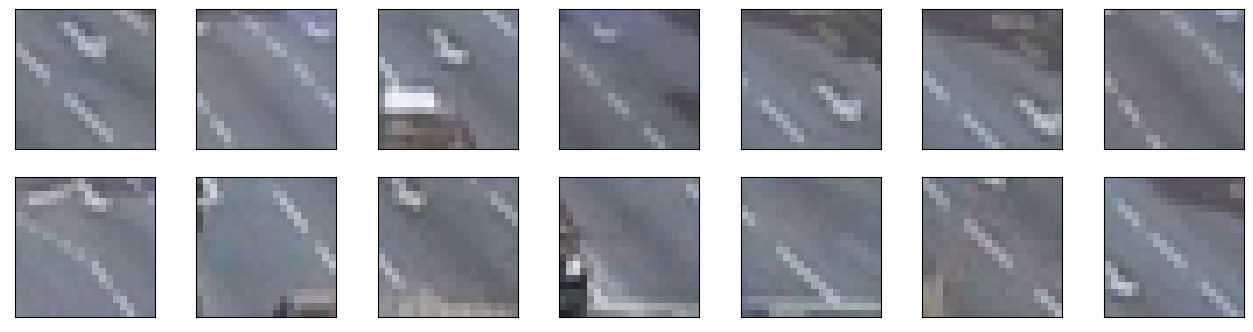

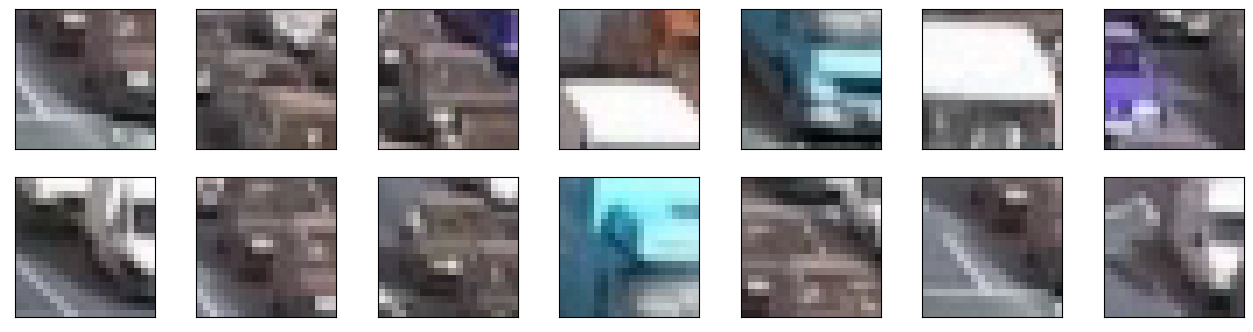

In [5]:
show_images(background_images)
show_images(foreground_images)

In [6]:
def split_data():
    X = np.append(background_images, foreground_images, axis=0)
    y = np.asarray([0]*len(background_images) + [1]*len(foreground_images))
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=999)
    
    return X_train, X_test, y_train, y_test

In [7]:
X_train, X_test, y_train, y_test = split_data()
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(396, 20, 20, 3)
(99, 20, 20, 3)
(396,)
(99,)


In [8]:
def run_model():
    input_0 = Input(shape=(X_train.shape[1], X_train.shape[2], 3))
    layer = Conv2D(32, (3,3), activation='relu', strides=(1,1), padding='same')(input_0)
    layer = MaxPooling2D((2,2))(layer)
    layer = Flatten()(layer)
    layer = Dense(32, activation='relu')(layer)
    layer = Dense(16, activation='relu')(layer)
    output_0 = Dense(1, activation='sigmoid')(layer)
    
    model = Model(input_0, output_0)
    
    model.compile(loss='binary_crossentropy', 
                  optimizer='adam', metrics=['acc'])
    
    history = model.fit(X_train, y_train, epochs=30, validation_data=(X_test,y_test))
    
    return model, history

In [9]:
model, history = run_model()

Epoch 1/30
13/13 [==============================] - 2s 30ms/step - loss: 13.8346 - acc: 0.4798 - val_loss: 0.6926 - val_acc: 0.4646
Epoch 2/30
13/13 [==============================] - 0s 12ms/step - loss: 0.8848 - acc: 0.5051 - val_loss: 0.9195 - val_acc: 0.5556
Epoch 3/30
13/13 [==============================] - 0s 12ms/step - loss: 0.5082 - acc: 0.7247 - val_loss: 0.3968 - val_acc: 0.8485
Epoch 4/30
13/13 [==============================] - 0s 12ms/step - loss: 0.1781 - acc: 0.9495 - val_loss: 0.0722 - val_acc: 0.9899
Epoch 5/30
13/13 [==============================] - 0s 12ms/step - loss: 0.0903 - acc: 0.9672 - val_loss: 0.0340 - val_acc: 0.9899
Epoch 6/30
13/13 [==============================] - 0s 12ms/step - loss: 0.0440 - acc: 0.9899 - val_loss: 0.1349 - val_acc: 0.9394
Epoch 7/30
13/13 [==============================] - 0s 12ms/step - loss: 0.0377 - acc: 0.9823 - val_loss: 0.1676 - val_acc: 0.9394
Epoch 8/30
13/13 [==============================] - 0s 11ms/step - loss: 0.0213 - 

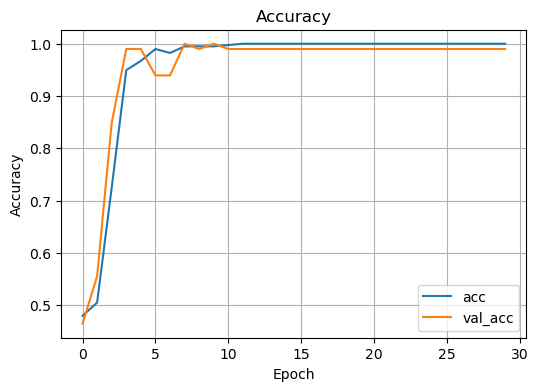

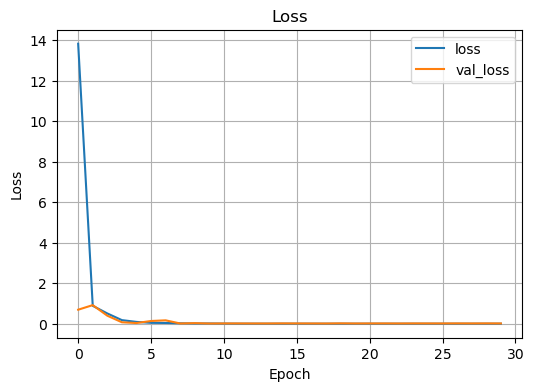

In [14]:
plt.figure(figsize=(6,4))
plt.title('Accuracy')
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc', 'val_acc'])
plt.grid()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

plt.figure(figsize=(6,4))
plt.title('Loss')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.grid()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [15]:
model.save('cnn_block_prediction.h5')